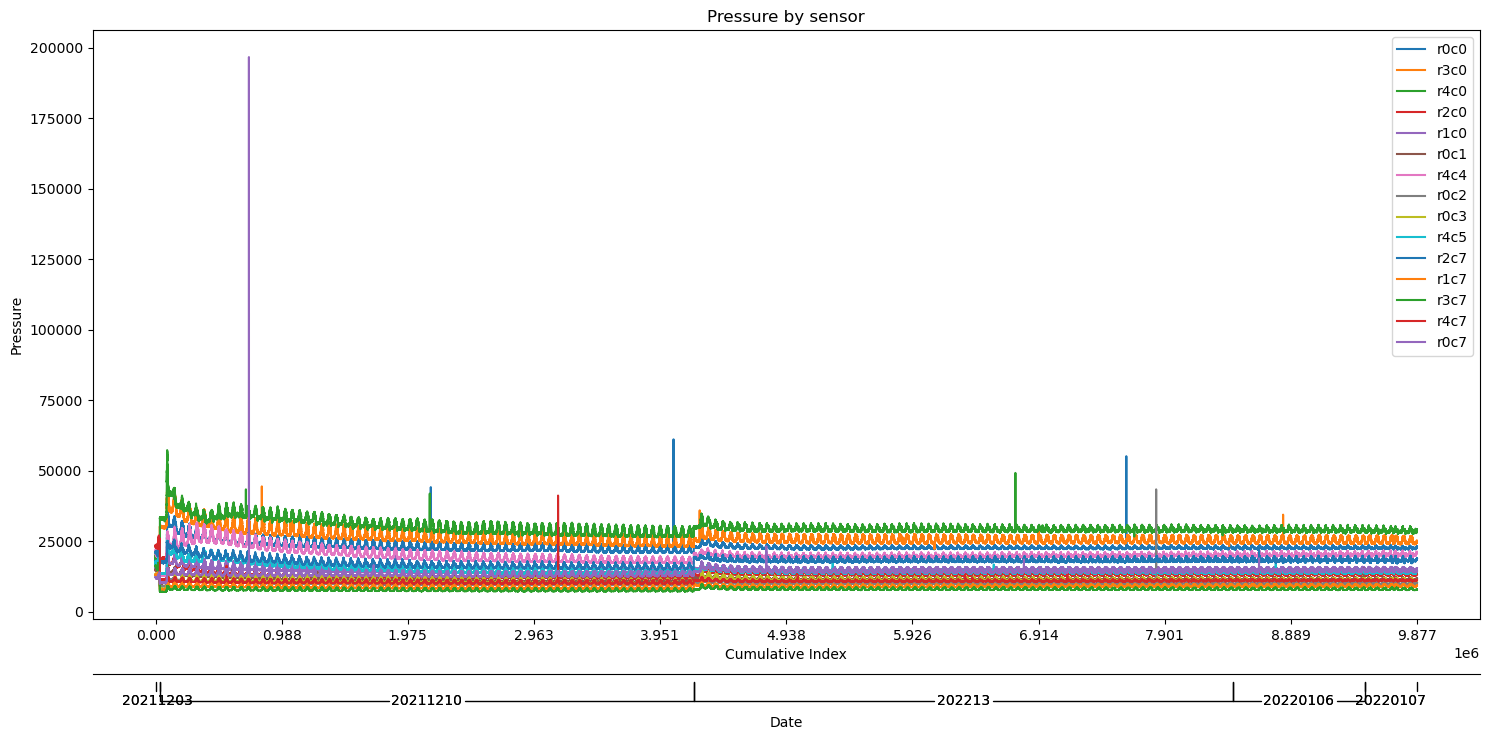

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.signal import argrelextrema
plt.style.use('default')

plt.rcParams["figure.figsize"] = [15, 7.5]
plt.rcParams["figure.autolayout"] = True

def main():
    #-- Generate some data ----------------------------------------------------
    
    columns= ['Cumulative Index', 'r0c0','r3c0','r4c0','r2c0','r1c0', 'r0c1', 'r4c4', 'r0c2', 'r0c3', 'r4c5', 'r2c7', 'r1c7', 'r3c7', 'r4c7', 'r0c7']
    df=pd.read_csv('11020434_press.csv')
    pf=df[columns]
    groups = getGroups(df)

    #-- Plot the results ------------------------------------------------------
    fig = plt.figure()
    ax = fig.add_subplot(111)
    #ax.autoscale(enable=True, axis='both', tight=True)

    # Give ourselves a bit more room at the bottom
    plt.subplots_adjust(bottom=0.2)

    pf.set_index('Cumulative Index', inplace=True)
    ax.plot(pf, label=['r0c0','r3c0','r4c0','r2c0','r1c0', 'r0c1', 'r4c4', 'r0c2', 'r0c3', 'r4c5', 'r2c7', 'r1c7', 'r3c7', 'r4c7', 'r0c7'])
    # Drop the bottom spine by 40 pts
    ax.spines['bottom'].set_position(('outward', 0))

    # Make a second bottom spine in the position of the original bottom spine
    make_second_bottom_spine(label='Date')
    
    # Annotate the groups
    for name, xspan in groups:
        annotate_group(name, xspan)

    plt.xlabel('Cumulative Index')
    plt.xticks(df['Cumulative Index'][::len(df)//10])
    plt.ylabel('Pressure')
    plt.title('Pressure by sensor')
    plt.legend()
    plt.show()
    


def annotate_group(name, xspan, ax=None):
    """Annotates a span of the x-axis"""
    def annotate(ax, name, left, right, y, pad):
        arrow = ax.annotate(name,
                xy=(left, y), xycoords='data',
                xytext=(right, y-pad), textcoords='data',
                annotation_clip=False, verticalalignment='top',
                horizontalalignment='center', linespacing=1.0,
                arrowprops=dict(arrowstyle='-', shrinkA=0, shrinkB=0,
                        connectionstyle='angle,angleB=90,angleA=0,rad=0') #connectionstyle='angle,angleB=90,angleA=0,rad=10'
                )
        return arrow
    if ax is None: #Changes position of the arrows. Should work with ymin.
        ax = plt.gca()
    ymin = ax.get_ylim()[0]
    #print(ymin)
    ypad = 0.01 * np.ptp(ax.get_ylim())
    #print(ypad)
    xcenter = np.mean(xspan)
    left_arrow = annotate(ax, name, xspan[0], xcenter, -25000, ypad*2)
    right_arrow = annotate(ax, name, xspan[1], xcenter, -25000, ypad*2)
    return left_arrow, right_arrow

def make_second_bottom_spine(ax=None, label=None, offset=0, labeloffset=70): #Changes Date and the line of Date
    """Makes a second bottom spine"""
    if ax is None:
        ax = plt.gca()
    second_bottom = mpl.spines.Spine(ax, 'bottom', ax.spines['bottom']._path)
    second_bottom.set_position(('outward', 40))
    ax.spines['second_bottom'] = second_bottom

    if label is not None:
        # Make a new xlabel
        ax.annotate(label, 
                xy=(0.5, 0), xycoords='axes fraction', 
                xytext=(0, -labeloffset), textcoords='offset points', 
                verticalalignment='top', horizontalalignment='center')

def getGroups(df):
    dup = df.drop_duplicates('Date', keep='last')
    date_list = dup['Date'].tolist()
    index_list= dup['Cumulative Index'].tolist()
    
    groups = []
    start_index = 0
    for i in range(len(date_list)):
        last_index = index_list[i]
        groups.append((date_list[i], (start_index, last_index)))
        start_index = last_index + 1
    return groups

if __name__ == '__main__':
    main()